# RelaxDeclarativeConstraints: Tutorial
This notebook provides a brief tutorial on how to use RelaxDeclarativeConstraints tool step-by-step to generate constraints from a business process model, i.e., sound, free-choice workflow net, in the context of process mining. Alternatively, we can the run tool from the command line, as explained in the [README](https://github.com/rehman-qureshi/RelaxDeclarativeConstraints/blob/main/README.md) document.

RelaxDeclarativeConstraints translate the business process model into declarative constraints. These constraints are used for immediate process insights regarding business process management.  

# Import Required Libraries
First, we import the necessary libraries, including `sys`, `os`, `display`, `Image` and the custom modules: `create_alpha_relations_matrix`, `relaxing_declarative_constraints`, and `visualize_pnml_model`. The functionalities of custom modules are briefly explained in the [README](https://github.com/rehman-qureshi/RelaxDeclarativeConstraints/blob/main/README.md) document. 

In [6]:
# Import Required Libraries
import sys
import os
from create_alpha_relations_matrix import matrix_function
from relaxing_declarative_constraints_cmd import relax_constraints_function
from visualize_pnml_model import visualize_function
from IPython.display import Image, display

# Input: Business Process Model
RelaxDeclarativeConstraitns tool takes process model in pnml format as an input from the [data](https://github.com/rehman-qureshi/RelaxDeclarativeConstraints/tree/main/data) folder, and generates three files as output, i.e., process model in PNG format, alpha relation matrix and declarative constraints in csv format in the [output](https://github.com/rehman-qureshi/RelaxDeclarativeConstraints/tree/main/output) folder.

In [7]:
# Input business process model in pnml format
pnml_path = './data/model_a.pnml' 
# We need to change the pnml_path variable for other business process models, such as ICPM conformance challenge 2020

# Output
# 1. Visualize PNML Model
The `visualize_function` is called with the PNML file path to visualize the business process model.

Visualization saved as .\output\model_a.png


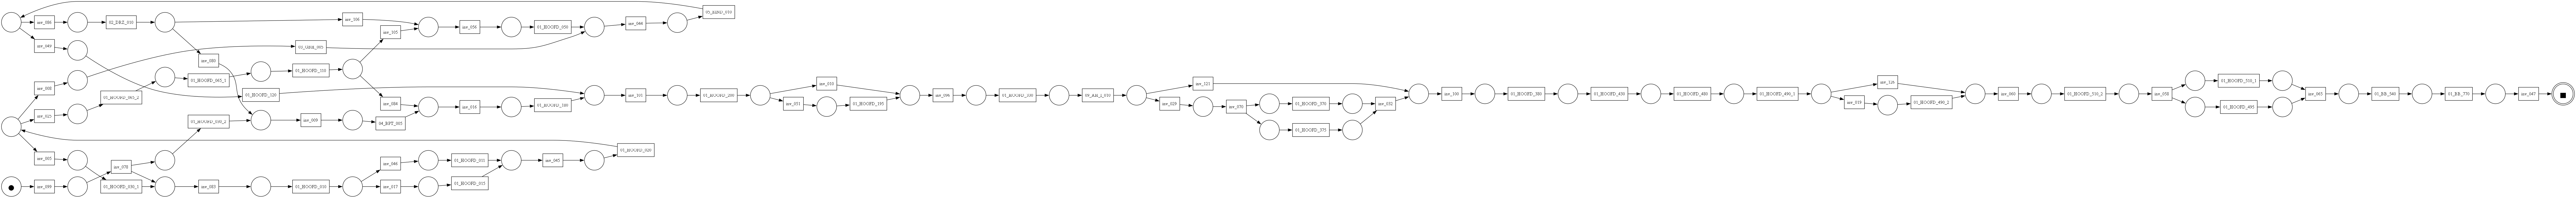

In [8]:
# Call the visualization function to fetch and show the business process model
output_image_path = visualize_function(pnml_path)
# Display the generated PNG file
if os.path.exists(output_image_path):
    display(Image(filename=output_image_path))
else:
    print("Visualization file not found. Please check the PNML file path and try again.")

# 2. Create Alpha Relations Matrix
The `matrix_function` is called to create the alpha relations matrix and retrieve the last transitions from the PNML model. It takes the PNML file path as input and returns:
- `df`: The alpha relations matrix as a DataFrame.
- `last_activities`: A set of the last activity or activities in the business process model.

If the matrix is successfully created, it proceeds to the next step; otherwise, it prints an error message.

In [9]:
# Call the matrix function
df, last_activties = matrix_function(pnml_path)
if df is not None:
    # display alpha relations matrix, which is created by using a business process model.'
    print("Alpha Relations Matrix of the business process model.")
    print(df) 
    # display the last transitions in the business process model
    print(f"Last activitiy or activities in the business process model: ",last_activties)
else:
    print("Failed to create the alpha relations matrix.")

Create Alpha-Relations Matrix
Matrix saved to output\model_a_alpha_relations_matrix.csv
Alpha Relations Matrix of the business process model.
        Unnamed: 0 01_BB_540 05_EIND_010 inv_005 inv_049 inv_084 01_HOOFD_495  \
0        01_BB_540         -          ||      ||      ||      ||           ||   
1      05_EIND_010        ||           -       -       →       -           ||   
2          inv_005        ||           -       -       -       -           ||   
3          inv_049        ||           ←       -       -       -           ||   
4          inv_084        ||           -       -       -       -           ||   
..             ...       ...         ...     ...     ...     ...          ...   
61         inv_060        ||          ||      ||      ||      ||           ||   
62  01_HOOFD_030_2        ||          ||      ||      ||      ||           ||   
63         inv_070        ||          ||      ||      ||      ||           ||   
64         inv_086        ||           ←       -

# 3. Derive Relaxed Declarative Constraints
The `relax_constraints_function` is called with the created alpha relations matrix and last activties of business process model to derive relaxed constraints.  
It takes the following parameters:
- `df`: The alpha relations matrix.
- `last_activties`: The last activity or activites before the termination of business process model.

In [10]:
if df is not None:
    # Fetch the last activity or activites before the termination of business process model
    print(f"The list of last activity or activities : ",last_activties)
    # Call the relax constraints function
    constraints_df=relax_constraints_function(df, last_activties)
    if constraints_df is not True:
        print("Failed to derived relaxed declarative constraints.")

The list of last activity or activities :  ['inv_047']
Initial Constraints Set is determining ... 
Length of Initial Constraints Set: 3267
Current Set of Initial Constraints:
1: ('01_HOOFD_375', 'inv_008')
2: ('inv_010', '01_HOOFD_120')
3: ('01_HOOFD_370', 'inv_044')
4: ('inv_070', 'inv_056')
5: ('inv_121', '01_BB_540')
6: ('inv_019', '01_HOOFD_380')
7: ('01_HOOFD_110', '01_HOOFD_490_2')
8: ('inv_044', 'inv_065')
9: ('01_HOOFD_370', 'inv_049')
10: ('inv_070', '01_HOOFD_010')
11: ('inv_029', 'inv_046')
12: ('01_HOOFD_380', 'inv_086')
13: ('inv_086', '01_HOOFD_200')
14: ('inv_032', '01_HOOFD_120')
15: ('01_HOOFD_011', '01_HOOFD_030_2')
16: ('inv_084', '01_HOOFD_195')
17: ('inv_065', 'inv_045')
18: ('inv_084', 'inv_019')
19: ('01_HOOFD_510_2', '01_BB_540')
20: ('01_HOOFD_030_1', '01_HOOFD_510_2')
21: ('inv_016', 'inv_025')
22: ('inv_065', '01_HOOFD_015')
23: ('inv_009', 'inv_016')
24: ('inv_078', 'inv_083')
25: ('inv_083', 'inv_032')
26: ('inv_058', '01_HOOFD_030_1')
27: ('01_HOOFD_195', 

Enter the number of the constraint you want to remove (e.g., 1, 2, etc.):  12


Removed Constraint: ('01_HOOFD_380', 'inv_086')
Modified Initial Constraints Set: 3266
Modified Transitive Closed Constraints Set: 606
('inv_046', '03_GBH_005')
('01_HOOFD_011', '01_HOOFD_120')
('01_HOOFD_020', '01_HOOFD_110')
('01_HOOFD_030_1', '01_HOOFD_050')
('inv_045', '01_HOOFD_011')
('inv_017', '01_HOOFD_110')
('inv_078', '09_AH_I_010')
('inv_065', '01_HOOFD_495')
('inv_086', '05_EIND_010')
('inv_099', 'inv_100')
('inv_099', 'inv_080')
('01_HOOFD_011', '01_HOOFD_110')
('inv_078', 'inv_086')
('01_HOOFD_020', '01_HOOFD_030_1')
('inv_044', 'inv_044')
('inv_046', 'inv_106')
('01_HOOFD_015', 'inv_105')
('inv_044', 'inv_049')
('01_HOOFD_020', '01_HOOFD_050')
('01_HOOFD_065_1', '01_HOOFD_050')
('inv_008', 'inv_080')
('inv_078', 'inv_121')
('inv_105', 'inv_080')
('inv_078', '01_HOOFD_110')
('inv_126', 'inv_126')
('inv_099', 'inv_105')
('01_HOOFD_050', 'inv_056')
('01_HOOFD_015', '01_HOOFD_120')
('01_HOOFD_010', 'inv_025')
('01_HOOFD_010', '05_EIND_010')
('inv_099', '09_AH_I_010')
('inv_0

Do you want to remove more constraint from the Initial Constraints Set? (yes/no):  yes


Current Set of Initial Constraints:
1: ('01_HOOFD_375', 'inv_008')
2: ('inv_010', '01_HOOFD_120')
3: ('01_HOOFD_370', 'inv_044')
4: ('inv_070', 'inv_056')
5: ('inv_121', '01_BB_540')
6: ('inv_019', '01_HOOFD_380')
7: ('01_HOOFD_110', '01_HOOFD_490_2')
8: ('inv_044', 'inv_065')
9: ('01_HOOFD_370', 'inv_049')
10: ('inv_070', '01_HOOFD_010')
11: ('inv_029', 'inv_046')
12: ('inv_086', '01_HOOFD_200')
13: ('inv_032', '01_HOOFD_120')
14: ('01_HOOFD_011', '01_HOOFD_030_2')
15: ('inv_084', '01_HOOFD_195')
16: ('inv_065', 'inv_045')
17: ('inv_084', 'inv_019')
18: ('01_HOOFD_510_2', '01_BB_540')
19: ('01_HOOFD_030_1', '01_HOOFD_510_2')
20: ('inv_016', 'inv_025')
21: ('inv_065', '01_HOOFD_015')
22: ('inv_009', 'inv_016')
23: ('inv_078', 'inv_083')
24: ('inv_083', 'inv_032')
25: ('inv_058', '01_HOOFD_030_1')
26: ('01_HOOFD_195', '01_HOOFD_030_1')
27: ('01_BB_540', '01_HOOFD_490_1')
28: ('01_HOOFD_375', '01_HOOFD_430')
29: ('01_HOOFD_510_1', 'inv_029')
30: ('01_HOOFD_200', '01_HOOFD_370')
31: ('01_

Enter the number of the constraint you want to remove (e.g., 1, 2, etc.):  12


Removed Constraint: ('inv_086', '01_HOOFD_200')
Modified Initial Constraints Set: 3265
Modified Transitive Closed Constraints Set: 606
('inv_046', '03_GBH_005')
('01_HOOFD_011', '01_HOOFD_120')
('01_HOOFD_020', '01_HOOFD_110')
('01_HOOFD_030_1', '01_HOOFD_050')
('inv_045', '01_HOOFD_011')
('inv_017', '01_HOOFD_110')
('inv_078', '09_AH_I_010')
('inv_065', '01_HOOFD_495')
('inv_086', '05_EIND_010')
('inv_099', 'inv_100')
('inv_099', 'inv_080')
('01_HOOFD_011', '01_HOOFD_110')
('inv_078', 'inv_086')
('01_HOOFD_020', '01_HOOFD_030_1')
('inv_044', 'inv_044')
('inv_046', 'inv_106')
('01_HOOFD_015', 'inv_105')
('inv_044', 'inv_049')
('01_HOOFD_020', '01_HOOFD_050')
('01_HOOFD_065_1', '01_HOOFD_050')
('inv_008', 'inv_080')
('inv_078', 'inv_121')
('inv_105', 'inv_080')
('inv_078', '01_HOOFD_110')
('inv_126', 'inv_126')
('inv_099', 'inv_105')
('01_HOOFD_050', 'inv_056')
('01_HOOFD_015', '01_HOOFD_120')
('01_HOOFD_010', 'inv_025')
('01_HOOFD_010', '05_EIND_010')
('inv_099', '09_AH_I_010')
('inv_0

Do you want to remove more constraint from the Initial Constraints Set? (yes/no):  no


Inside generate_declare_and_regex_function and length of directlyFollowSet:  3265
Declarative Constraints and Regular Expressions saved to 'output\translated_resulting_df_relations.csv'
